In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 24

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/26_Merge_all_with_time.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:21000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

Shape = (20999, 38)
Testing MSE  106.94707961850372
Testing RMSE  10.341522113233802
Testing MAE  5.62587673118275
Shape = (20998, 38)
Testing MSE  115.21937294923312
Testing RMSE  10.734028738047664
Testing MAE  6.286275641508452
Shape = (20997, 38)
Testing MSE  115.03023864746113
Testing RMSE  10.725215086302985
Testing MAE  6.5157316790119495
Shape = (20996, 38)
Testing MSE  110.27435263014011
Testing RMSE  10.501159585023938
Testing MAE  6.49528379293803
Shape = (20995, 38)
Testing MSE  106.97413713946156
Testing RMSE  10.342830228687966
Testing MAE  6.4485913826118075
Shape = (20994, 38)
Testing MSE  106.4833561702758
Testing RMSE  10.319077292581726
Testing MAE  6.427485322638421
Shape = (20993, 38)
Testing MSE  106.75598441982933
Testing RMSE  10.332278762200977
Testing MAE  6.415377460231674
Shape = (20992, 38)
Testing MSE  108.80033228449498
Testing RMSE  10.43073977647295
Testing MAE  6.403451345959609
Shape = (20991, 38)
Testing MSE  111.73950961361153
Testing RMSE  10.57069

In [ ]:
RhourpreRMSE = []
RhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/26_Merge_all_with_time.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:21000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
    
    from sklearn.linear_model import Ridge
    clf = Ridge().fit(X_train,y_train)
    predf = clf.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))

    RhourpreRMSE.append(RMSE)
    RhourpreMAE.append(MAE)


Shape = (20999, 38)
Testing MSE  106.94676965424796
Testing RMSE  10.34150712682866
Testing MAE  5.625836447781406
Shape = (20998, 38)
Testing MSE  115.21838042186587
Testing RMSE  10.733982505196563
Testing MAE  6.286233870311764
Shape = (20997, 38)
Testing MSE  115.02907564028125
Testing RMSE  10.725160867804327
Testing MAE  6.515751484817358
Shape = (20996, 38)
Testing MSE  110.27282388650836
Testing RMSE  10.501086795494473
Testing MAE  6.495342884200322
Shape = (20995, 38)
Testing MSE  106.97198709946322
Testing RMSE  10.342726289497524
Testing MAE  6.44868138832394
Shape = (20994, 38)
Testing MSE  106.48121210629803
Testing RMSE  10.318973403701458
Testing MAE  6.427595700740118
Shape = (20993, 38)
Testing MSE  106.75410580840621
Testing RMSE  10.332187851970472
Testing MAE  6.4155128174110345
Shape = (20992, 38)
Testing MSE  108.79877551739453
Testing RMSE  10.430665152203598
Testing MAE  6.403607839350409
Shape = (20991, 38)
Testing MSE  111.73812035296645
Testing RMSE  10.5706

In [ ]:
LhourpreRMSE = []
LhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/26_Merge_all_with_time.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:21000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

    from sklearn import linear_model
    clf = linear_model.Lasso().fit(X_train,y_train)
    predf = clf.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))

    LhourpreRMSE.append(RMSE)
    LhourpreMAE.append(MAE)

Shape = (20999, 38)
Testing MSE  115.17421176840665
Testing RMSE  10.731924886450084
Testing MAE  6.371724718719996
Shape = (20998, 38)
Testing MSE  130.91009898784478
Testing RMSE  11.441595124275494
Testing MAE  7.631861148475582
Shape = (20997, 38)
Testing MSE  137.44129195461514
Testing RMSE  11.723535812826057
Testing MAE  8.30340385498265
Shape = (20996, 38)
Testing MSE  135.6894672520579
Testing RMSE  11.648582199223128
Testing MAE  8.520161797890632
Shape = (20995, 38)
Testing MSE  133.47950138884178
Testing RMSE  11.553332912577297
Testing MAE  8.588857582158251
Shape = (20994, 38)
Testing MSE  134.22901117433148
Testing RMSE  11.585724456171546
Testing MAE  8.630873931663542
Shape = (20993, 38)
Testing MSE  135.3253201446958
Testing RMSE  11.63294116484287
Testing MAE  8.664722224167928
Shape = (20992, 38)
Testing MSE  139.26475176828458
Testing RMSE  11.801048757135298
Testing MAE  8.754101631098443
Shape = (20991, 38)
Testing MSE  142.98765297767562
Testing RMSE  11.9577444

In [ ]:
ENhourpreRMSE = []
ENhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/26_Merge_all_with_time.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:21000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

    from sklearn.linear_model import ElasticNet 
    regr = ElasticNet(random_state=0).fit(X_train,y_train)
    predf = regr.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))


    ENhourpreRMSE.append(RMSE)
    ENhourpreMAE.append(MAE)

Shape = (20999, 38)
Testing MSE  114.23037219897078
Testing RMSE  10.687860973972798
Testing MAE  6.339407111036564
Shape = (20998, 38)
Testing MSE  129.02423964169614
Testing RMSE  11.358883732202568
Testing MAE  7.52117456044309
Shape = (20997, 38)
Testing MSE  133.3271571462185
Testing RMSE  11.546737943948434
Testing MAE  8.07584478377391
Shape = (20996, 38)
Testing MSE  130.4413836690162
Testing RMSE  11.421093803529336
Testing MAE  8.259154771507317
Shape = (20995, 38)
Testing MSE  128.1167281017686
Testing RMSE  11.318866025435966
Testing MAE  8.337331461398858
Shape = (20994, 38)
Testing MSE  128.87440248449377
Testing RMSE  11.352286222805244
Testing MAE  8.391934744670248
Shape = (20993, 38)
Testing MSE  129.89403343821584
Testing RMSE  11.397106362503417
Testing MAE  8.430299473759927
Shape = (20992, 38)
Testing MSE  133.03791446919516
Testing RMSE  11.534206278248849
Testing MAE  8.499639837751163
Shape = (20991, 38)
Testing MSE  136.29021026516986
Testing RMSE  11.67433982

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


GBMhourpreRMSE = []
GBMhourpreMAE = []
for a in range(Hour_ahead):

    hour_ahead = a+1
    n_estimators = 7
    learning_rate = 0.1
    Depth = 8
    Min_leaf = 1

    path = "/content/drive/MyDrive/Colab Notebooks/Project/26_Merge_all_with_time.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:21000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))



    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)



    class DecisionTree():
        def __init__(self, x, y, n_features, f_idxs, idxs=None, depth=3, min_leaf=5):
            if idxs is None: idxs=np.arange(len(y))
            self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
            self.depth = depth
            #print(f_idxs)
            #         print(self.depth)
            self.n_features = n_features
            self.n, self.c = len(idxs), x.shape[1]
            self.val = np.mean(y[idxs])
            self.score = float('inf')
            self.find_varsplit()

        def find_varsplit(self):
            for i in self.f_idxs: self.find_better_split(i)
            if self.is_leaf: return
            x = self.split_col
            lhs = np.nonzero(x <= self.split)[0]
            rhs = np.nonzero(x > self.split)[0]
            lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)
            self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)

        def find_better_split(self, var_idx):
            x, y = self.x[self.idxs, var_idx], self.y[self.idxs]
            sort_idx = np.argsort(x)
            sort_y, sort_x = y[sort_idx], x[sort_idx]
            rhs_sum2: object
            rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y ** 2).sum()
            lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.

            for i in range(0, self.n - self.min_leaf - 1):
                xi, yi = sort_x[i], sort_y[i]
                lhs_cnt += 1
                rhs_cnt -= 1
                lhs_sum += yi
                rhs_sum -= yi
                lhs_sum2 += yi ** 2
                rhs_sum2 -= yi ** 2
                if i < self.min_leaf or xi == sort_x[i + 1]:
                    continue

                lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
                rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
                curr_score = lhs_std * lhs_cnt + rhs_std * rhs_cnt
                if curr_score < self.score:
                    self.var_idx, self.score, self.split = var_idx, curr_score, xi

        @property
        def split_name(self):
            return self.x.columns[self.var_idx]

        @property
        def split_col(self):
            return self.x[self.idxs, self.var_idx]

        @property
        def is_leaf(self):
            return self.score == float('inf') or self.depth <= 0

        def predict(self, x):
            return np.array([self.predict_row(xi) for xi in x])

        def predict_row(self, xi):
            if self.is_leaf: return self.val
            t = self.lhs if xi[self.var_idx] <= self.split else self.rhs
            return t.predict_row(xi)

    def std_agg(cnt, s1, s2):
        try:
            return math.sqrt((s2 / cnt) - (s1 / cnt) ** 2)
        except:
            return 0

    xi = X_train
    train_index = X_train.shape
    yi = y_train - np.mean(y_train)
    ei = 0  # initialization of error
    predf = np.mean(y_train)  # initial prediction 0


    def create_tree(x, y, n_features, sample_sz, depth=3, min_leaf=5):
        idxs = np.random.permutation(len(y))[:sample_sz]
        f_idxs = np.random.permutation(x.shape[1])[:n_features]
        return DecisionTree(x[idxs], y[idxs], n_features, f_idxs,
                            idxs=np.array(range(sample_sz)), depth=depth, min_leaf=min_leaf)


    print("hour_ahead = " + str(hour_ahead))
    print("n_estimators = " + str(n_estimators))
    print("learning_rate = " + str(learning_rate))
    print("Depth = " + str(Depth))
    print("Min_leaf = " + str(Min_leaf))


    trees = []
    for i in range(n_estimators):
        tree = create_tree(xi, yi, train_index[1], train_index[0], depth=Depth, min_leaf=Min_leaf)
        predi = tree.predict(xi)
        predf = predf + learning_rate * predi
        print(str(i)+str("  ")+str(mean_absolute_error(y_train, predf)))
        ei = y_train - predf  # needed originl y here as residual always from original y
        yi = ei  # update yi as residual to reloop
        trees.append(tree)


    MSE = mean_squared_error(y_train, predf, squared=True)
    print("Training MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Training RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_train, predf)
    print("Training MAE  " + str(MAE))



    xi = X_test
    train_index = X_test.shape
    yi = y_test - np.mean(y_test)
    ei = 0  # initialization of error
    predf = np.mean(y_test)

    i = 0
    for t in trees:
        predi = t.predict(X_test)
        predf = predf + learning_rate * predi
        print(str(i)+str("  ")+str(mean_absolute_error(y_test, predf)))
        ei = y_test - predf  # needed originl y here as residual always from original y
        yi = ei  # update yi as residual to reloop

        #if i == 6:
        #   break
        i += 1


    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))

    GBMhourpreRMSE.append(RMSE)
    GBMhourpreMAE.append(MAE)




Shape = (20999, 38)
hour_ahead = 1
n_estimators = 7
learning_rate = 0.1
Depth = 8
Min_leaf = 1
0  7.214968479729342
1  6.623447882667607
2  6.093333250757348
3  5.636110095276441
4  5.225376719791366
5  4.863858853600579
6  4.5344370918622605
Training MSE  45.717418678554694
Training RMSE  6.761465719690864
Training MAE  4.5344370918622605
0  6.967058980060418
1  6.345909241399025
2  5.861642152743537
3  5.4839145132934055
4  5.20445352233098
5  5.012417676086008
6  4.932075791073825
Testing MSE  98.84028176527691
Testing RMSE  9.941844987992768
Testing MAE  4.932075791073825
Shape = (20998, 38)
hour_ahead = 2
n_estimators = 7
learning_rate = 0.1
Depth = 8
Min_leaf = 1
0  7.263059307689824
1  6.713660762955345
2  6.219383573265592
3  5.785763758997793
4  5.408170265732341
5  5.071627163751967
6  4.7728612166424345
Training MSE  51.344408694558204
Training RMSE  7.165501287039045
Training MAE  4.7728612166424345
0  7.031204885480398
1  6.443653076778365
2  6.028542498933174
3  5.7033278

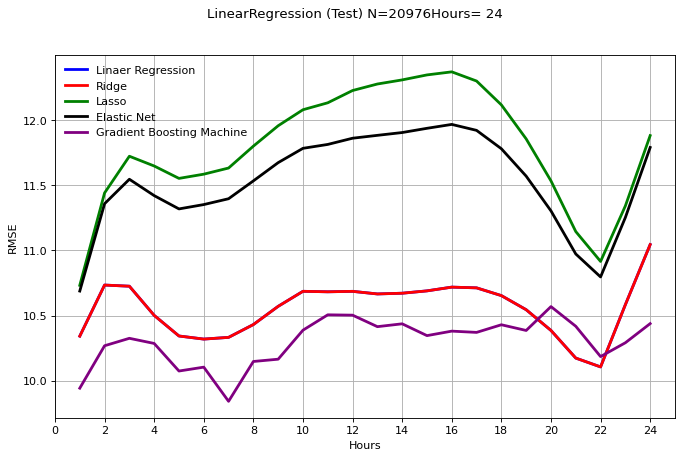

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.suptitle('LinearRegression (Test) N=' + str(Pred_index[0]) +'Hours= '+ str(Hour_ahead))
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.plot(np.arange(len(RhourpreRMSE))+1, RhourpreRMSE, color="red", linewidth=2.5, linestyle="-", label='Ridge')
plt.plot(np.arange(len(LhourpreRMSE))+1, LhourpreRMSE, color="green", linewidth=2.5, linestyle="-", label='Lasso')
plt.plot(np.arange(len(ENhourpreRMSE))+1, ENhourpreRMSE, color="black", linewidth=2.5, linestyle="-", label='Elastic Net')
plt.plot(np.arange(len(GBMhourpreRMSE))+1, GBMhourpreRMSE, color="purple", linewidth=2.5, linestyle="-", label='Gradient Boosting Machine')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend(frameon=False)
plt.show()

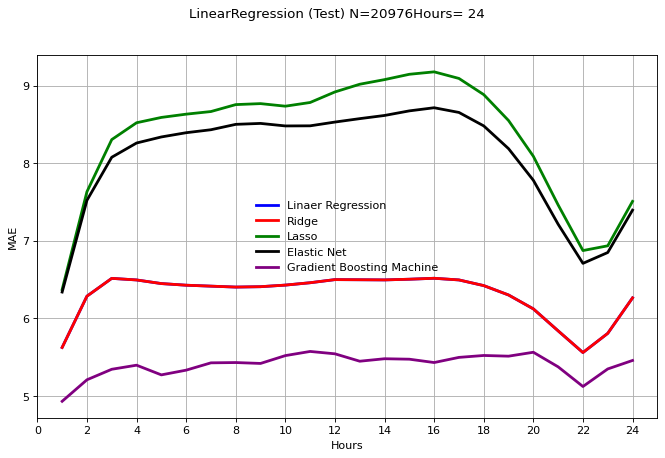

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
plt.suptitle('LinearRegression (Test) N=' + str(Pred_index[0]) +'Hours= '+ str(Hour_ahead))
plt.plot(np.arange(len(LRhourpreMAE))+1, LRhourpreMAE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.plot(np.arange(len(RhourpreMAE))+1, RhourpreMAE, color="red", linewidth=2.5, linestyle="-", label='Ridge')
plt.plot(np.arange(len(LhourpreMAE))+1, LhourpreMAE, color="green", linewidth=2.5, linestyle="-", label='Lasso')
plt.plot(np.arange(len(ENhourpreMAE))+1, ENhourpreMAE, color="black", linewidth=2.5, linestyle="-", label='Elastic Net')
plt.plot(np.arange(len(GBMhourpreMAE))+1, GBMhourpreMAE, color="purple", linewidth=2.5, linestyle="-", label='Gradient Boosting Machine')
plt.xlabel('Hours')
plt.ylabel('MAE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend(frameon=False)
plt.show()